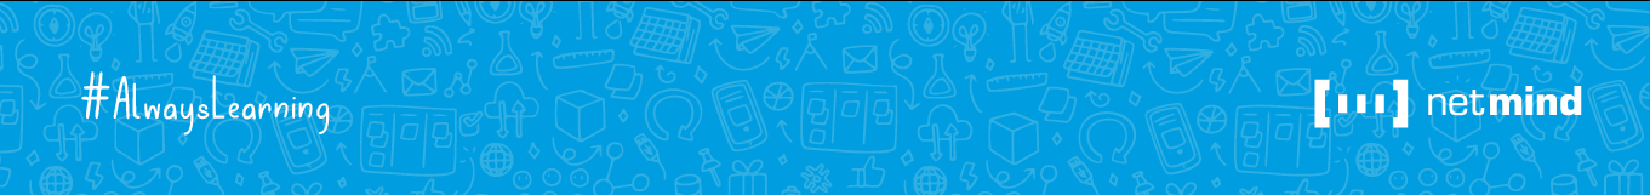
# **Tracking de modelo con MLFlow**

Cada vez que se entrena un modelo, se desea que los resultados sean reproducibles.  Mediante el seguimiento y el registro del trabajo, se puede revisar el trabajo en cualquier momento y decidir cuál es el mejor enfoque para entrenar un modelo.

- MLflow es una librería de código abierto para realizar seguimiento y administrar los experimentos de ML. 
- En concreto, el seguimiento de MLflow es un componente de MLflow que registra todo sobre el modelo que está entrenando, como parámetros, métricasy artefactos.

Para usar MLflow en notebooks en el área de trabajo de Azure Machine Learning, se deberá instalar las librerías necesarias y establecer Azure Machine Learning como almacén de seguimiento. 

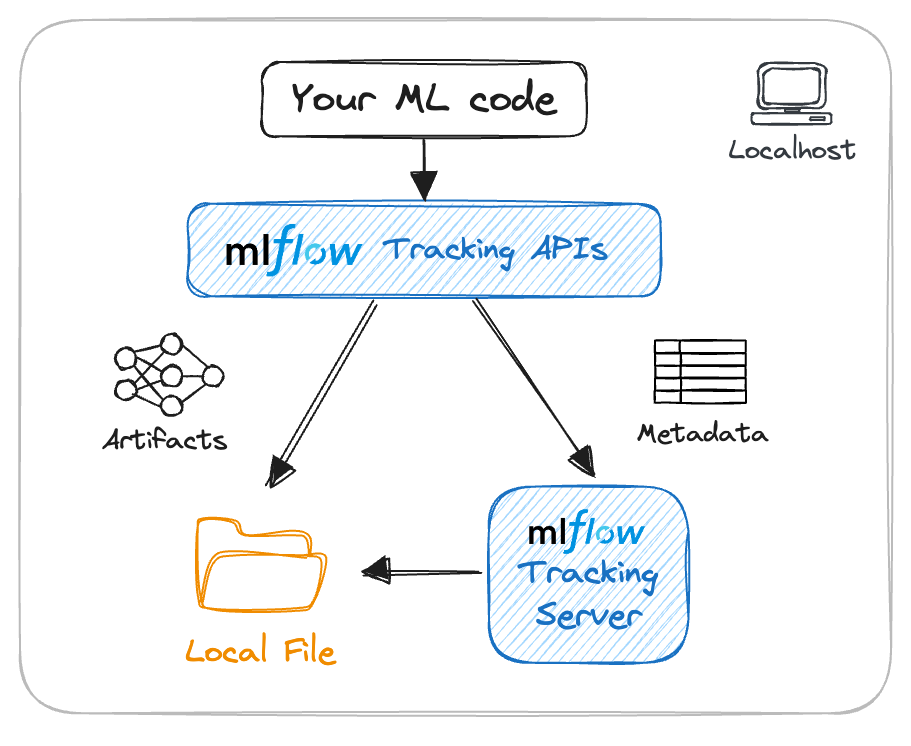

https://mlflow.org/docs/latest/

https://learn.microsoft.com/en-us/azure/machine-learning/concept-mlflow?view=azureml-api-2

## **Configuración de MLflow en jupyter notebooks**

En el área de trabajo de Azure Machine Learning, se puede crear notebooks y conectarlos a una instancia de proceso administrado.

- Al ejecutar un cuaderno en una instancia de proceso, MLflow ya está configurado y listo para usarse.

- Para comprobar que los paquetes necesarios están instalados, puede ejecutar el código siguiente:

In [1]:
! pip show mlflow
! pip show azureml-mlflow

Name: azureml-mlflow
Version: 1.60.0
Summary: Contains the integration code of AzureML with Mlflow.
Home-page: https://docs.microsoft.com/python/api/overview/azure/ml/?view=azure-ml-py
Author: Microsoft Corp
Author-email: 
License: https://aka.ms/azureml-sdk-license
Location: /anaconda/envs/azureml_py38/lib/python3.10/site-packages
Requires: azure-common, azure-core, azure-identity, azure-mgmt-core, azure-storage-blob, cryptography, jsonpickle, mlflow-skinny, msrest, python-dateutil, pytz
Required-by: azureml-train-automl-runtime


Para usar en local usar la URI de seguimiento de MLflow

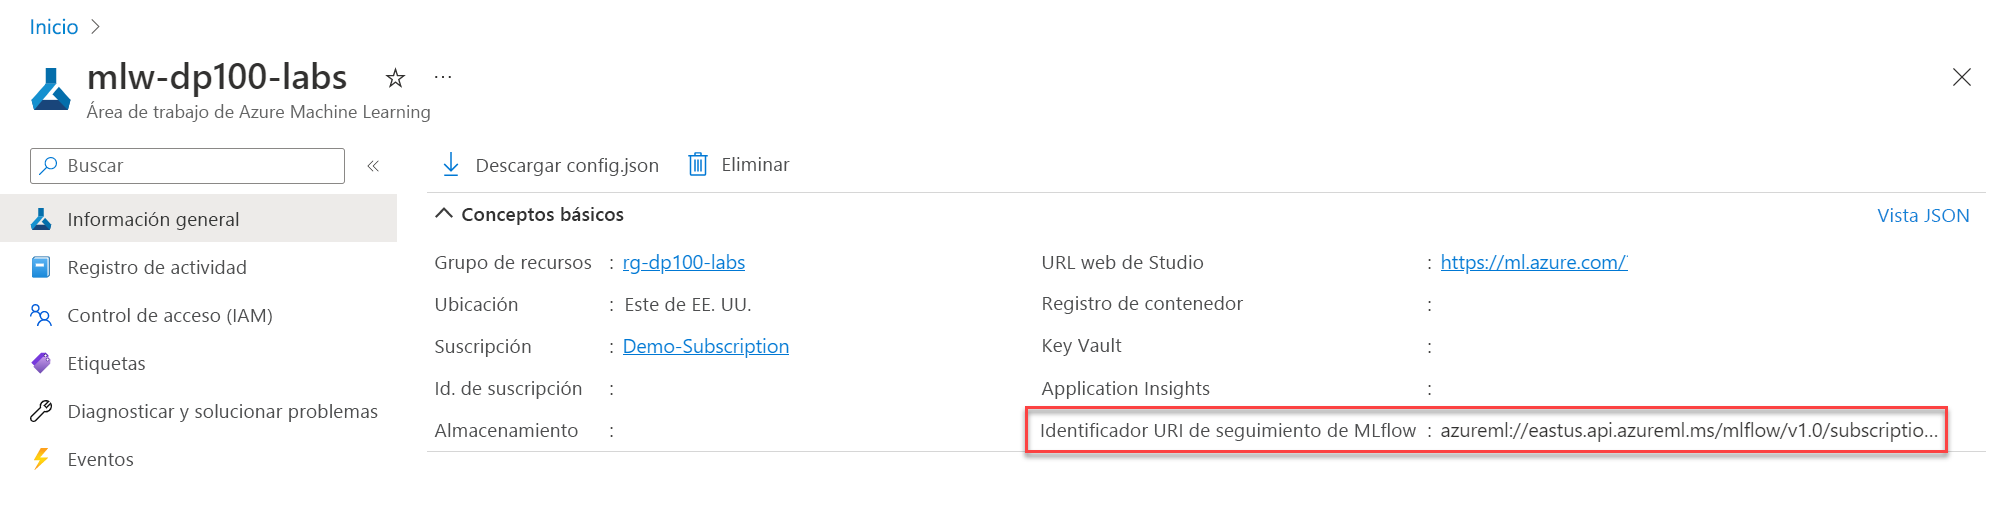

## **Entrenamiento y seguimiento de modelos**

### Creación de un experimento de MLflow

In [ ]:
import mlflow

mlflow.set_experiment(experiment_name="heart-condition-classifier")

### Registrar resultados con MLflow
Para iniciar una ejecución rastreada por MLflow, usar `start_run()`. 

A continuación, para realizar el seguimiento del modelo:
- Habilitar el registro automático .
- Utilizar de registro personalizado.

### Registro automático

Se puede activar el registro automático mediante el método `autolog` para el marco que usa. ç

Por ejemplo, para habilitar el registro automático para los modelos XGBoost, puede usar mlflow.xgboost.autolog().

In [ ]:
from xgboost import XGBClassifier

with mlflow.start_run():
    mlflow.xgboost.autolog()

    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

Una vez completado el job, se puede revisar todas las métricas registradas en Studio.

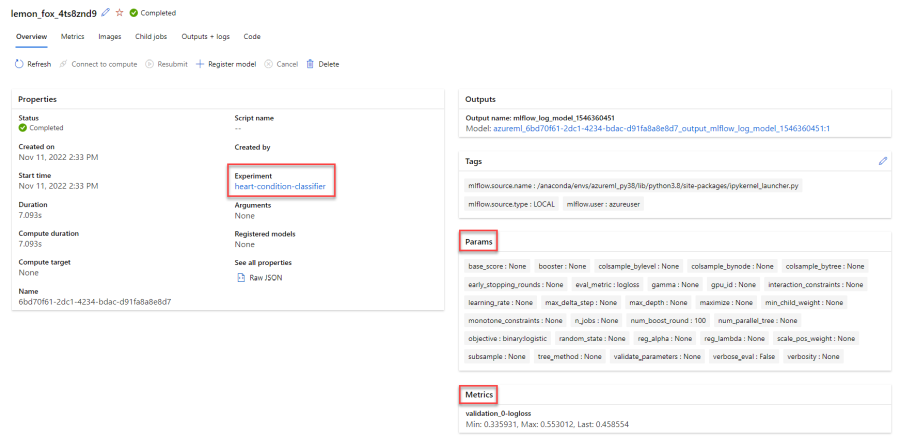

### Registro personalizado

Las funciones comunes que se usan con el registro personalizado son:

- `mlflow.log_param()`: registra un único parámetro de clave-valor. Use esta función para un parámetro de entrada que desee registrar.
- `mlflow.log_metric()`: registra una sola métrica de clave-valor. El valor debe ser un número. Use esta función para cualquier salida que desee almacenar con la ejecución.
- `mlflow.log_artifact()`: registra un archivo. Use esta función para cualquier trazado que quiera registrar, guarde primero como archivo de imagen.
- `mlflow.log_model()`: registra un modelo. Use esta función para crear un modelo de MLflow, que puede incluir ejemplos de entrada, entorno y firma personalizados.

Ejemplo:

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

with mlflow.start_run():
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

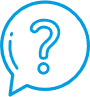
## **¿Preguntas?**

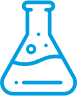
## **Lab 2**

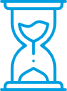
## **Ejercicio**

Usando el dataset de precios de casas (data/house_price/data.csv):
- Entrena un modelo y haz tracking de su entrenamiento usando MLFlow.